# Entrega 4 - Modelos de segmentación

**Autor(es):** María Paz Salazar Valderrama,
Juan Carlos Francisco Poveda

**Correo Electrónico:** maria.salazar2102@alumnos.ubiobio.cl, juan.francisco2001@alumnos.ubiobio.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [3]:
!pip install kneed

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import plotly.express as px

#%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score

from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [1]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-10 20:45:32--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.03s   

2025-07-10 20:45:32 (5.03 MB/s) - ‘datos_segmentacion.csv’ saved [159876/159876]



# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


In [13]:
df = pd.read_csv('datos_segmentacion.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

print("\nMissing Values:\n", df.isnull().sum())

print("\nBasic Statistics:\n", df.describe())

Dataset Shape: (5000, 5)

Column Names: ['actividad_fisica', 'pasos_diarios', 'calorias_gastadas', 'horas_de_sueno', 'nivel_descanso']

Data Types:
 actividad_fisica     float64
pasos_diarios        float64
calorias_gastadas    float64
horas_de_sueno       float64
nivel_descanso       float64
dtype: object

First 5 rows:
    actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
0              5.75       11278.26            2230.18            7.40   
1              4.79        9358.50            1886.49            7.48   
2              5.97       11045.24            2328.88            7.55   
3              7.28       14404.04            2924.86            8.16   
4              4.65        9663.95            1979.23            6.98   

   nivel_descanso  
0           75.74  
1           76.19  
2           70.77  
3           84.53  
4           62.32  

Missing Values:
 actividad_fisica     0
pasos_diarios        0
calorias_gastadas    0
horas_de_sueno       0
nivel_d

## Modelo de segmentación usando 2 variables

### Selección y justificación de variables

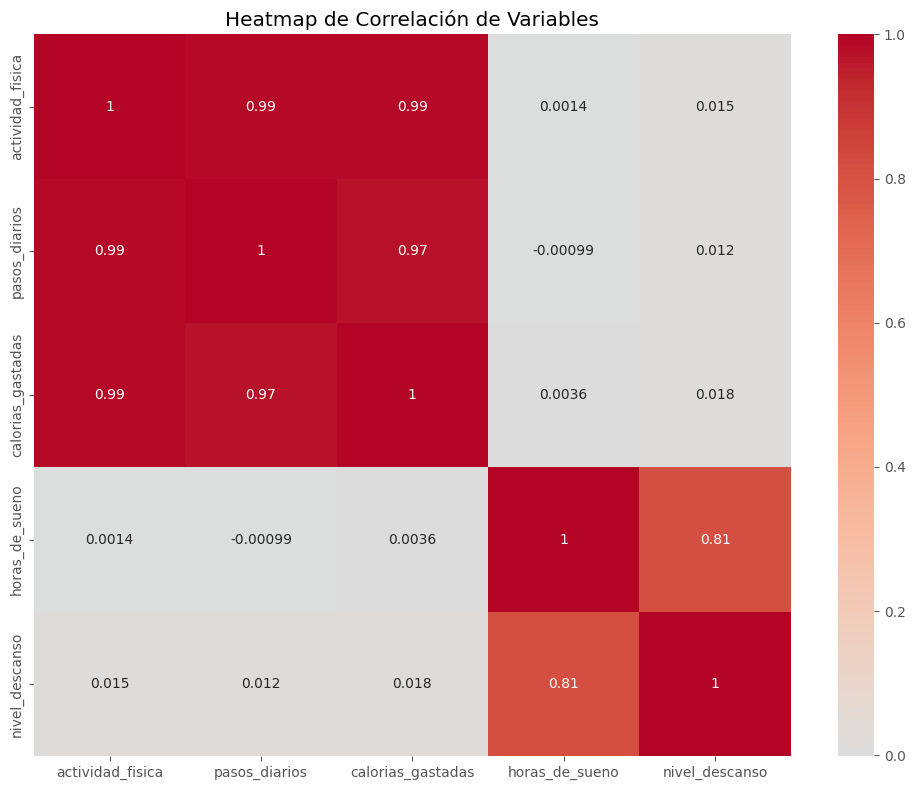

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación de Variables')
plt.tight_layout()
plt.show()

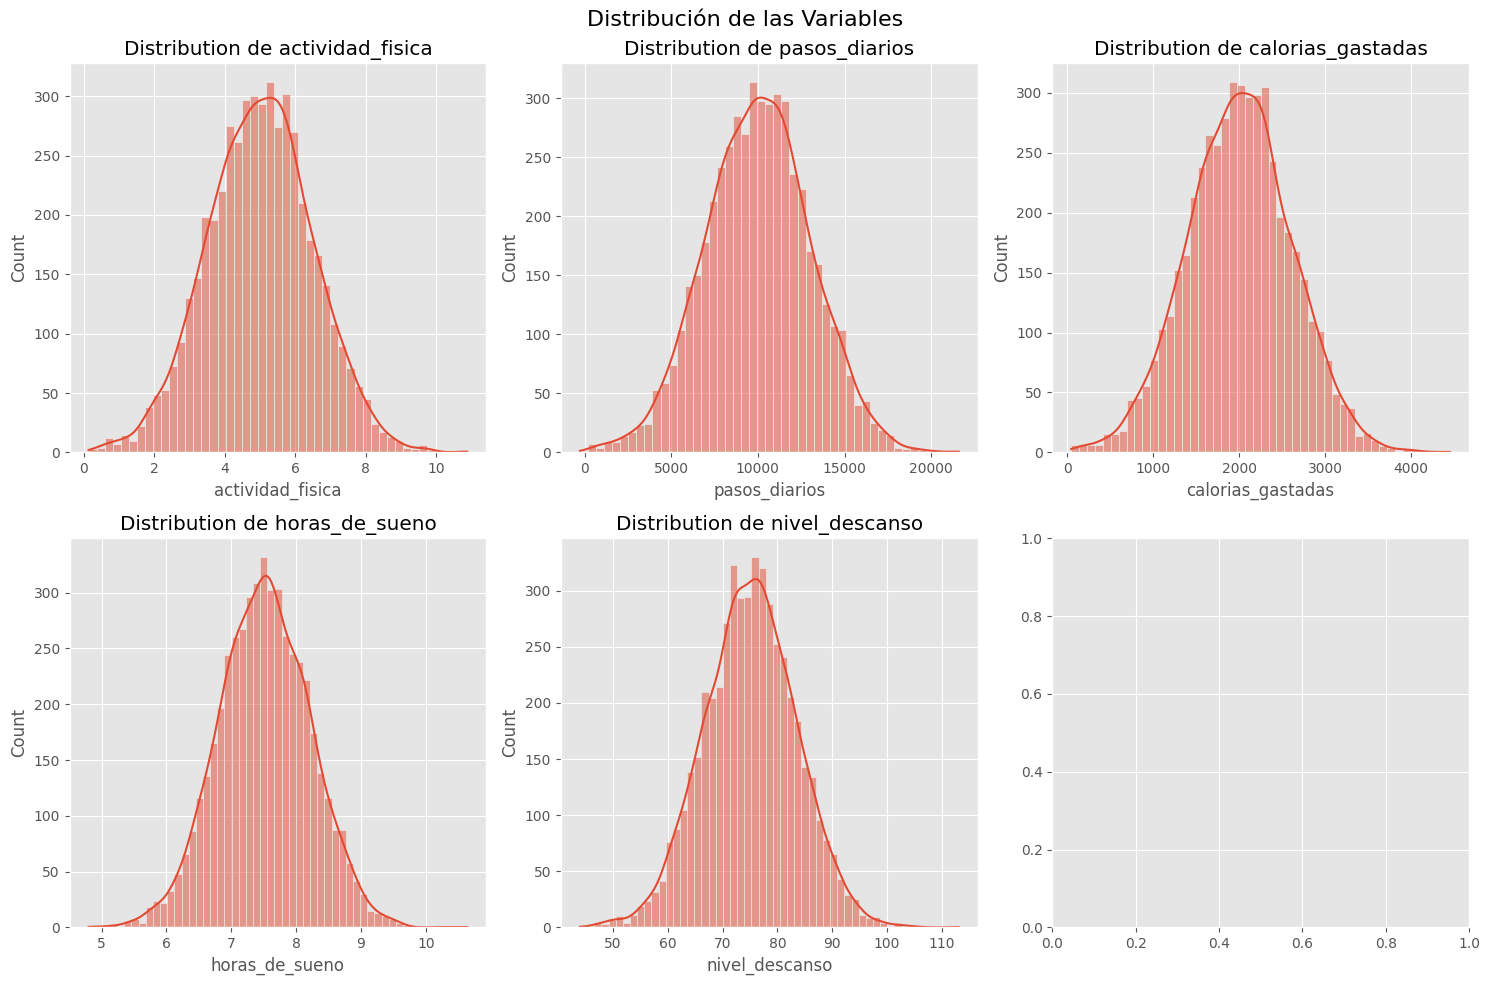

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de las Variables', fontsize=16)

variables = df.columns
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    if i < len(variables):
        sns.histplot(data=df, x=var, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution de {var}')

plt.tight_layout()
plt.show()

**Analisis Distribuciones:**

---

actividad_fisica

*   Distribución normal centrada en aproximadamente 5 horas.
*   Rango: 0 a 11 horas.
*   La mayoría de los usuarios realiza entre 4 y 6 horas de ejercicio semanal.

---

pasos_diarios

*   Distribución aproximadamente normal.
*   Centrada en torno a 10.000 pasos diarios.
*   Rango: ~0 a 22.000 pasos. (Existen valores negativos)
*   Coincide con las recomendaciones generales de salud.

---

calorias_gastadas

*   Distribución levemente sesgada a la derecha.
*   La mayoría de los usuarios quema entre 1.500 y 2.500 calorías.
*   Algunos valores atípicos superan las 4.000 calorías.

---

horas_de_sueno


*   Distribución normal.
*   Centrada en aproximadamente 7,5 horas.
*   Rango estrecho: 5 a 10 horas.
*   Acorde a la duración de sueño recomendada.

---

nivel_descanso (Índice de descanso)

*   Distribución aproximadamente normal.
*   Centrada en torno a 75.
*   Rango: 45 a 110.
*   Pocos valores atípicos en los valores más altos.

**Basado en los análisis previos, se decidió usar:**

*actividad_fisica* y *nivel_descanso*:


*   actividad_fisica: Métrica directa del compromiso del usuario con el ejercicio

*   nivel_descanso: Indicador clave del bienestar general



Características Estadísticas:

Ambas muestran distribuciones normales
Tienen menos valores atípicos que otras variables
Menor correlación entre sí (evita redundancia)

Ventajas Adicionales:

Representan aspectos complementarios del bienestar (actividad vs. descanso)
Facilitan la interpretación de los clusters resultantes
Variables más estables y confiables en comparación con pasos_diarios (que tiene valores negativos)


### Elección del número de cluster óptimo

Probando con varios clusters ...


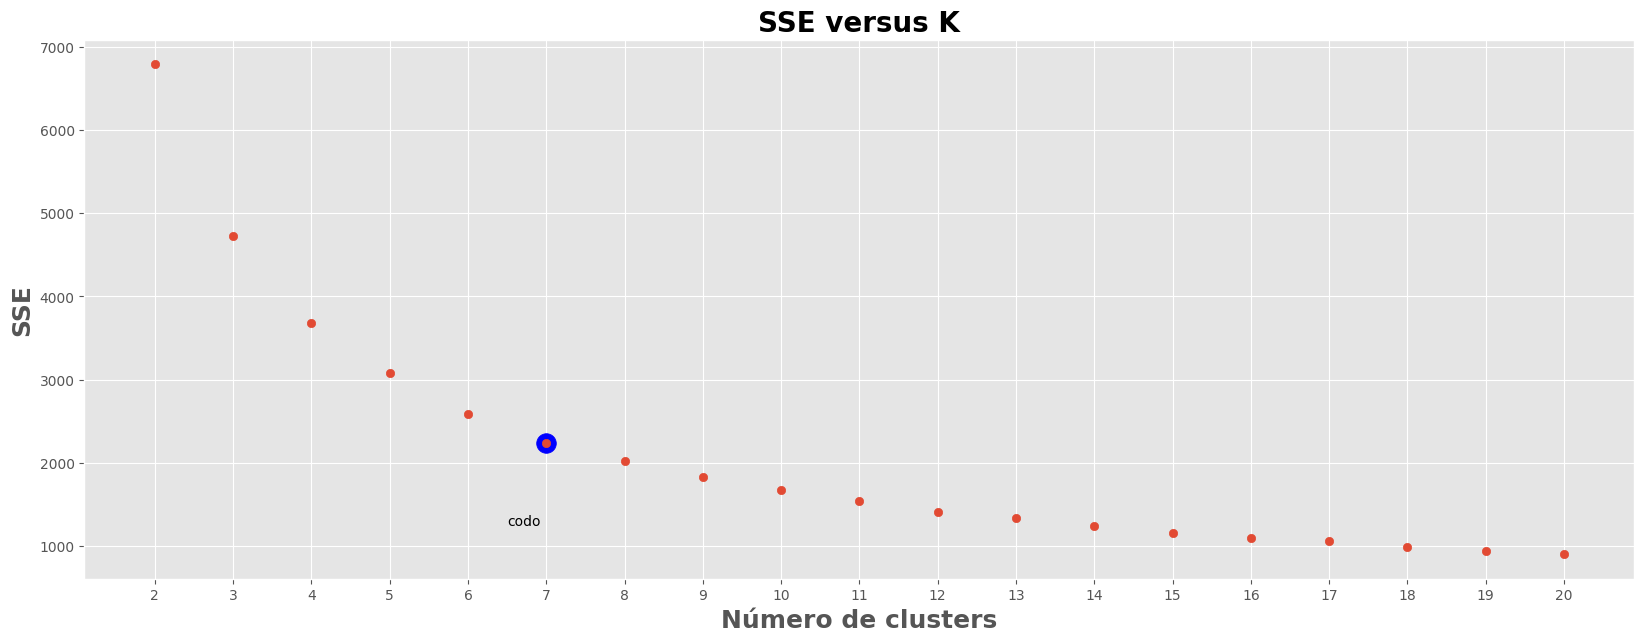

El codo está en k = 7
El SSE = [np.float64(2240.318680392516)]


In [28]:
# Preparación de datos
X = df[['actividad_fisica', 'nivel_descanso']]
X_scaled = StandardScaler().fit_transform(X)

# Cálculo de SSE
sse = []
print("Probando con varios clusters ...")
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_scaled)
    sse.append(kmeans.inertia_)

# Encontrar el codo
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

# Visualización
fig, ax = plt.subplots(figsize=(20, 7))

# Punto del codo
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200)
ax.text(kl.elbow-.5, sse[kl.elbow-2]-1000, s="codo")

# Gráfico SSE vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

### Creación y entrenamiento del modelo

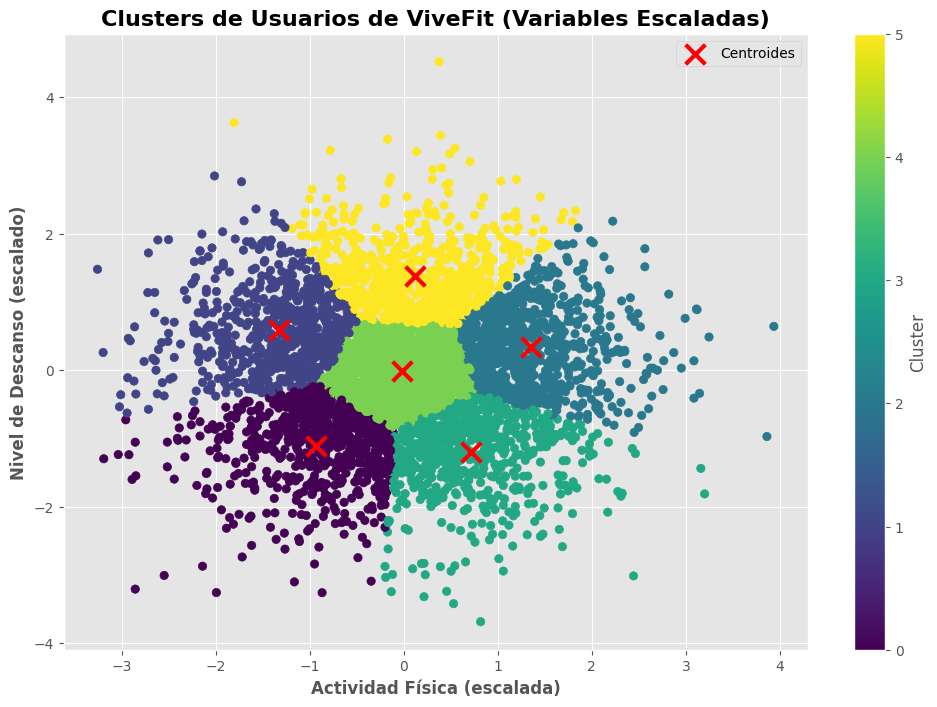

In [74]:
# Entrenar el modelo K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=kl.elbow, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

# Visualizar los resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, linewidths=3, color='r', label='Centroides')
plt.title('Clusters de Usuarios de ViveFit (Variables Escaladas)',
          fontsize=16, fontweight="bold")
plt.xlabel('Actividad Física (escalada)', fontsize=12, fontweight="bold")
plt.ylabel('Nivel de Descanso (escalado)', fontsize=12, fontweight="bold")
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

### Evaluación del modelo

In [77]:
# Evaluación de la calidad de los clusters
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# 1. Coeficiente de Silueta general
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de Silueta promedio: {silhouette_avg:.3f}")

silhouette_avg = silhouette_score(X, clusters)
print(f"Coeficiente de Silueta promedio sin escalar: {silhouette_avg:.3f}")

# 2. Tamaño de cada cluster
print("\nDistribución de puntos por cluster:")
for i in range(kl.elbow):
    print(f"Cluster {i}: {np.sum(clusters == i)} puntos")

# 4. Distancia promedio al centroide por cluster
distances = []
for i in range(kl.elbow):
    cluster_points = X_scaled[clusters == i]
    centroid = kmeans.cluster_centers_[i]
    dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    distances.append(dist)
    print(f"Distancia promedio al centroide en Cluster {i}: {dist:.3f}")

# Mostrar los centroides en escala original
centroides_originales = StandardScaler().fit(X).inverse_transform(kmeans.cluster_centers_)
print("\nCentroides en escala original:")
for i, centroide in enumerate(centroides_originales):
    print(f"\nCluster {i}:")
    print(f"Actividad Física: {centroide[0]:.2f} horas")
    print(f"Nivel de Descanso: {centroide[1]:.2f}")

Coeficiente de Silueta promedio: 0.320
Coeficiente de Silueta promedio sin escalar: 0.111

Distribución de puntos por cluster:
Cluster 0: 734 puntos
Cluster 1: 717 puntos
Cluster 2: 781 puntos
Cluster 3: 732 puntos
Cluster 4: 1299 puntos
Cluster 5: 737 puntos
Distancia promedio al centroide en Cluster 0: 0.690
Distancia promedio al centroide en Cluster 1: 0.684
Distancia promedio al centroide en Cluster 2: 0.683
Distancia promedio al centroide en Cluster 3: 0.679
Distancia promedio al centroide en Cluster 4: 0.489
Distancia promedio al centroide en Cluster 5: 0.681

Centroides en escala original:

Cluster 0:
Actividad Física: 3.61 horas
Nivel de Descanso: 65.66

Cluster 1:
Actividad Física: 3.02 horas
Nivel de Descanso: 79.94

Cluster 2:
Actividad Física: 7.03 horas
Nivel de Descanso: 77.88

Cluster 3:
Actividad Física: 6.08 horas
Nivel de Descanso: 64.91

Cluster 4:
Actividad Física: 4.98 horas
Nivel de Descanso: 74.93

Cluster 5:
Actividad Física: 5.18 horas
Nivel de Descanso: 86.70


**Análisis del Cluster 5**

Valores del centroide:

Actividad Física: 5.18 horas semanales

Nivel de Descanso: 86.07 puntos

**Actividad Física**

Los usuarios de este cluster realizan poco más de 5 horas de ejercicio semanal, lo que está ligeramente por encima de la media general. Esto representa un nivel de actividad física moderado.

**Nivel de Descanso**

Puntaje de 86.07, uno de los más altos entre todos los clusters, significativamente superior a la media general (75.02)
Indica una excelente calidad de descanso

**Perfil del Usuario**

Este cluster agrupa a usuarios que logran combinar una actividad física adecuada con un descanso sobresaliente. Es probable que tengan buenos hábitos de sueño y recuperación, lo que les permite mantener un bienestar integral.

**Relevancia para el Negocio**

Este grupo es valioso para identificar y promover buenas prácticas. Los usuarios de este cluster pueden servir como referencia para recomendaciones personalizadas y estrategias de fidelización.

## Modelo de segmentación usando 4 o más variables

### Selección de las variables

**Variables seleccionadas:**

actividad_fisica: Métrica directa de ejercicio

calorias_gastadas: Indicador general de gasto energético

horas_de_sueno: Componente crucial del bienestar

nivel_descanso: Indicador cualitativo del descanso

**Razones para excluir pasos_diarios:**

Alta correlación con calorias_gastadas (información redundante)

Presenta valores negativos en los datos (-266.63)

calorias_gastadas es una métrica más completa de actividad


### Selección de número de clusters óptimo

Probando con varios clusters ...


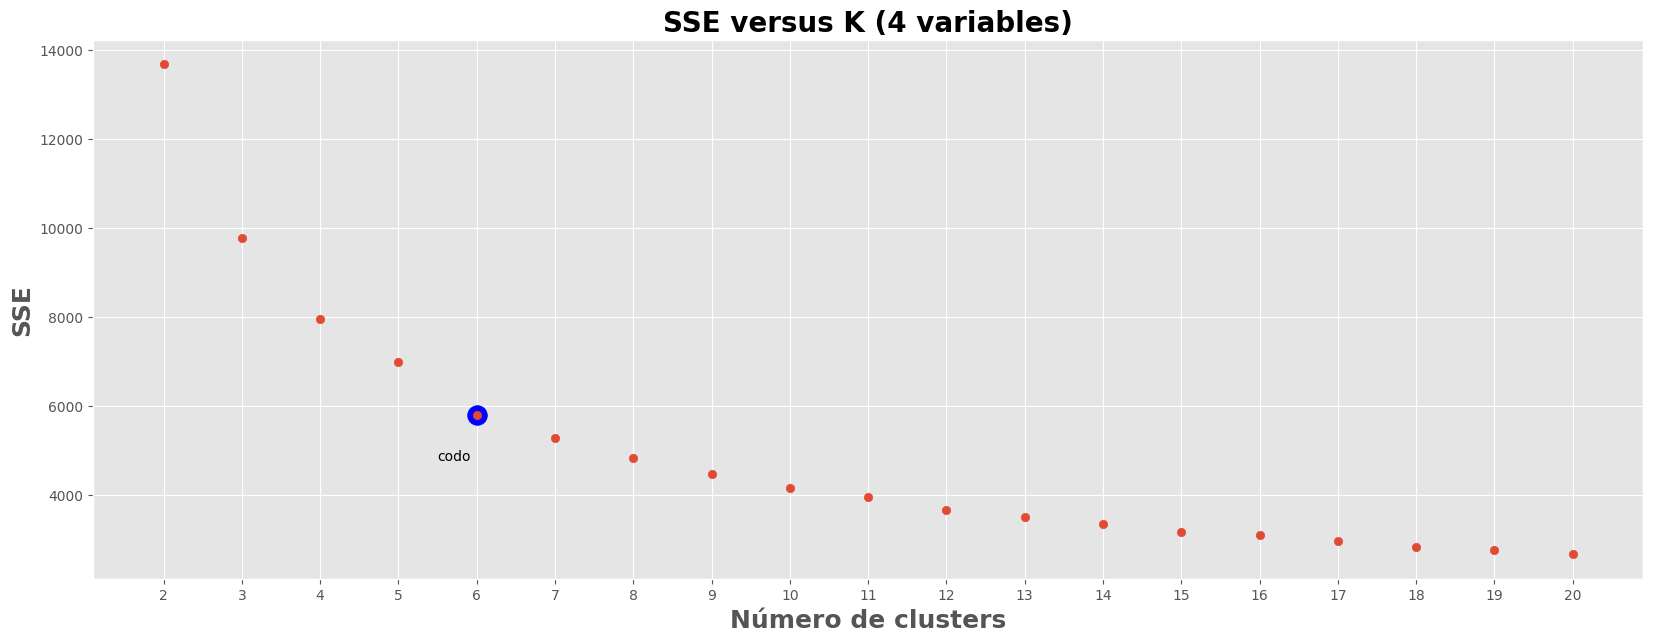

El codo está en k = 6
El SSE = [np.float64(5782.678425737083)]


In [36]:
# Preparación del nuevo conjunto de datos
variables_seleccionadas = ['actividad_fisica', 'calorias_gastadas',
                          'horas_de_sueno', 'nivel_descanso']
X_new = df[variables_seleccionadas]

# Escalado de variables
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Cálculo del SSE para encontrar k óptimo
sse = []
print("Probando con varios clusters ...")
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_new_scaled)
    sse.append(kmeans.inertia_)

# Encontrar el codo
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

# Visualización del método del codo
fig, ax = plt.subplots(figsize=(20, 7))
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200)
ax.text(kl.elbow-.5, sse[kl.elbow-2]-1000, s="codo")
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K (4 variables)", fontsize=20, fontweight="bold")
plt.show()

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

### Creación y entrenamiento del modelo

In [46]:
# Crear y entrenar el modelo K-means con k=6
kmeans_4var = KMeans(n_clusters=6, random_state=42, n_init="auto")
clusters_4var = kmeans_4var.fit_predict(X_new_scaled)

### Evaluación del modelo

In [64]:
# Evaluar la calidad de los clusters
silhouette_avg = silhouette_score(X_new_scaled, clusters_4var)
print(f"Coeficiente de Silueta promedio: {silhouette_avg:.3f}")

# Distribución de puntos por cluster
print("\nDistribución de puntos por cluster:")
for i in range(6):
    print(f"Cluster {i}: {np.sum(clusters_4var == i)} puntos")

centroides_originales = scaler.inverse_transform(kmeans_4var.cluster_centers_)
centroides_df = pd.DataFrame(
    centroides_originales,
    columns=variables_seleccionadas,
    index=[f'Cluster {i}' for i in range(6)]
)

# Mostrar centroides
print("\nCentroides en escala original:")
print(centroides_df.round(2))

# Calcular distancias promedio al centroide
print("\nDistancias promedio al centroide por cluster:")
for i in range(6):
    cluster_points = X_new_scaled[clusters_4var == i]
    centroid = kmeans_4var.cluster_centers_[i]
    dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    print(f"Cluster {i}: {dist:.3f}")

Coeficiente de Silueta promedio: 0.273

Distribución de puntos por cluster:
Cluster 0: 741 puntos
Cluster 1: 794 puntos
Cluster 2: 709 puntos
Cluster 3: 716 puntos
Cluster 4: 742 puntos
Cluster 5: 1298 puntos

Centroides en escala original:
           actividad_fisica  calorias_gastadas  horas_de_sueno  nivel_descanso
Cluster 0              4.60            1838.56            6.57           63.74
Cluster 1              6.51            2615.19            8.12           82.23
Cluster 2              4.16            1661.17            8.40           85.57
Cluster 3              6.87            2761.17            7.06           69.76
Cluster 4              2.88            1143.37            7.41           73.88
Cluster 5              4.97            1985.46            7.50           74.87

Distancias promedio al centroide por cluster:
Cluster 0: 1.053
Cluster 1: 1.014
Cluster 2: 1.058
Cluster 3: 1.048
Cluster 4: 1.085
Cluster 5: 0.812


Interpretación del centroide del Cluster 1

Valores del centroide:

Actividad Física: 6.51 horas semanales

Calorías Gastadas: 2615.19 kcal

Horas de Sueño: 8.12 horas

Nivel de Descanso: 82.23 puntos

Interpretación: El Cluster 1 representa usuarios con un perfil muy saludable:

Realizan alta actividad física (más de 6 horas semanales), lo que indica compromiso con el ejercicio.
Tienen un gasto energético elevado (más de 2600 kcal), asociado a entrenamientos intensos o frecuentes.
Duermen más de 8 horas diarias, lo que supera la recomendación estándar y favorece la recuperación.
Su nivel de descanso es alto (82.23), lo que sugiere buena calidad de sueño y hábitos saludables.
Conclusión:
Este grupo puede ser considerado como el segmento de usuarios más activos y descansados de la muestra, ideal para promover buenas prácticas y servir de referencia para otros usuarios.

### Aplicación de PCA

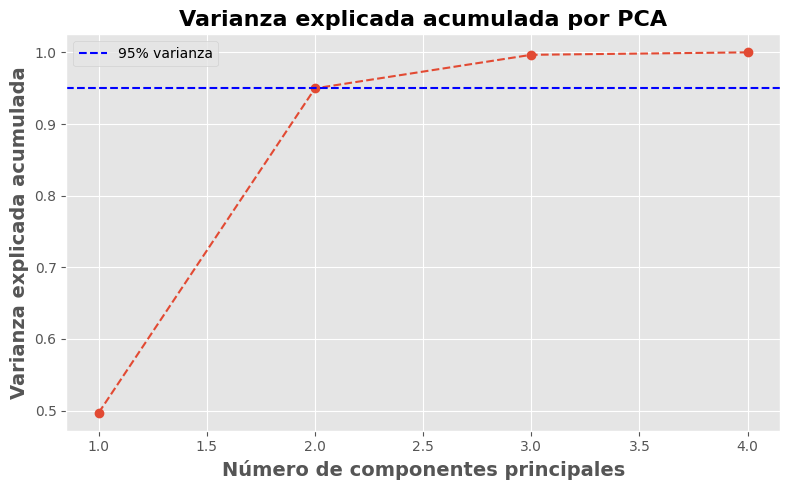

In [83]:
pca = PCA()
pca.fit(X_new_scaled)

# Calcular varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(varianza)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.95, color='b', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes principales', fontsize=14, fontweight="bold")
plt.ylabel('Varianza explicada acumulada', fontsize=14, fontweight="bold")
plt.title('Varianza explicada acumulada por PCA', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Al aplicar PCA sobre los datos escalados, obtuvimos los siguientes resultados de varianza explicada por cada componente:

Componente 1: 49.7%

Componente 2: 45.3%

Componente 3: 4.7%

Componente 4: 0.3%

Dado que los dos primeros componentes principales concentran prácticamente toda la información relevante (95% de la varianza), es adecuado retener únicamente estos dos componentes para la visualización y el análisis exploratorio.
Esto permite reducir la dimensionalidad del problema sin perder información significativa, facilitando la interpretación de los clusters y la representación gráfica en dos dimensiones.
Los componentes restantes aportan muy poca varianza adicional (<5%).

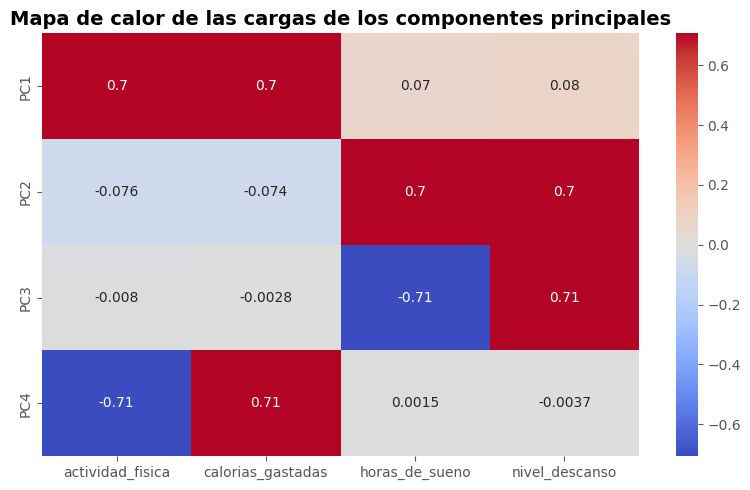

In [61]:
# Ajustar PCA para 4 componentes principales
pca_full = PCA(n_components=4)
pca_full.fit(X_new_scaled)
loadings_full = pd.DataFrame(
    pca_full.components_,
    columns=variables_seleccionadas,
    index=[f'PC{i+1}' for i in range(4)]
)

plt.figure(figsize=(8,5))
sns.heatmap(loadings_full, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de las cargas de los componentes principales", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

El mapa de calor muestra cómo cada variable original contribuye a cada componente principal:

PC1: Tiene cargas altas y positivas en actividad_fisica y calorias_gastadas (0.7 cada una).
Interpretación: Este componente representa principalmente el nivel de actividad física y gasto energético de los usuarios.

PC2: Tiene cargas altas y positivas en horas_de_sueno y nivel_descanso (0.7 cada una).
Interpretación: Este componente está relacionado con la calidad y cantidad de descanso.

PC3: Tiene una carga negativa fuerte en horas_de_sueno (-0.71) y positiva en nivel_descanso (0.71).
Interpretación: Diferencia usuarios que duermen mucho pero no necesariamente tienen buen descanso, y viceversa.

PC4: Tiene cargas opuestas en actividad_fisica (-0.71) y calorias_gastadas (0.71).
Interpretación: Distingue entre usuarios que gastan muchas calorías pero no necesariamente hacen mucho ejercicio, y al revés

**Conclusión:**

Gracias al analisis anterior, se puede inferir que:

Los dos primeros componentes principales (PC1 y PC2) capturan la mayor parte de la información relevante: actividad física/gasto energético y descanso.
Los componentes PC3 y PC4 capturan relaciones más específicas y diferencias entre variables similares.

Por lo cual, usaremos PC1 y PC2 para graficar los clusters.

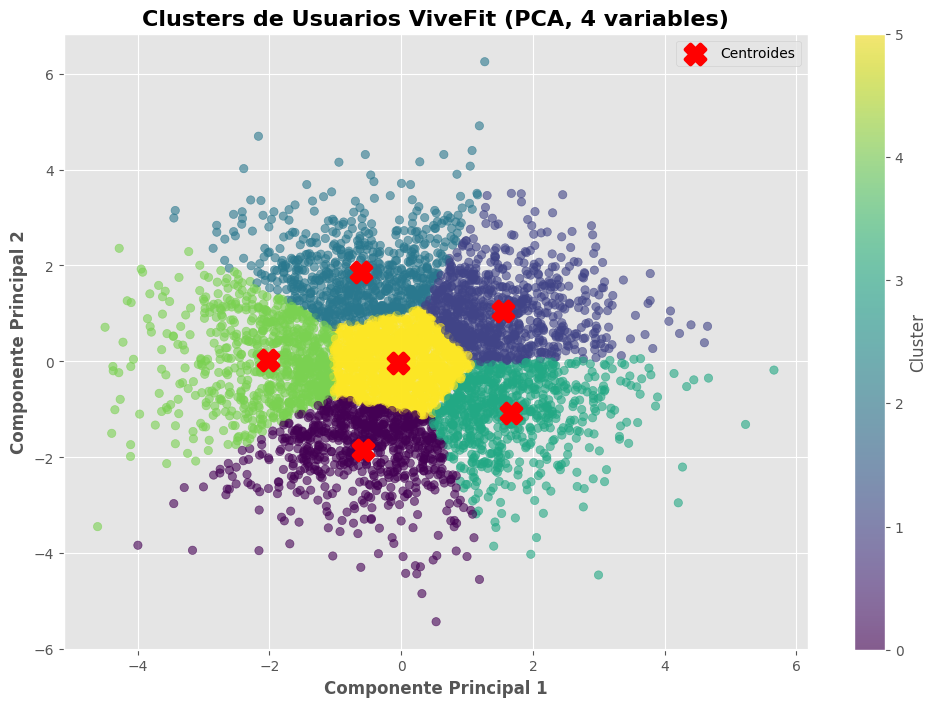

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new_scaled)
centroides_pca = pca.transform(kmeans_4var.cluster_centers_)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_4var, cmap='viridis', alpha=0.6)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker='X', s=200, linewidths=3, color='r', label='Centroides')
plt.title('Clusters de Usuarios ViveFit (PCA, 4 variables)', fontsize=16, fontweight="bold")
plt.xlabel('Componente Principal 1', fontsize=12, fontweight="bold")
plt.ylabel('Componente Principal 2', fontsize=12, fontweight="bold")
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

El gráfico muestra la segmentación de los usuarios de ViveFit en seis grupos distintos, proyectados en el espacio de los dos primeros componentes principales (PCA).

Los clusters se distribuyen de manera diferenciada, lo que indica que existen perfiles de usuarios con características de actividad física y descanso claramente separadas.
Los centroides muestran los valores promedio de cada grupo en el espacio reducido, facilitando la identificación de perfiles típicos.
Esta visualización permite a la empresa identificar segmentos de usuarios para personalizar recomendaciones y estrategias, basándose en patrones reales de comportamiento y bienestar.